### 1.*Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calc_logloss(y, y_pred, epsilon = 1e-12):    
    y_pred[y_pred==0] += epsilon
    y_pred[y_pred==1] -= epsilon
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

### 2.Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [3]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [4]:
def standard_scale(x):
    res = (x - x.mean()) / x.std()
    return res

def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [5]:
X_st = X.copy().astype(np.float64)

for i in range(X_st.shape[1]-1):
    X_st[:, i+1] = min_max_scale(X_st[:, i+1])
    


In [6]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    err_history = []
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(i, W, err)
        err_history.append(err)
    plt.plot(err_history)
    return W

0 [ 0.47225621 -0.14981514  0.63779595  1.51739065] 0.7829624915671743
1000 [-0.14558171 -3.22535128 -0.6968884   3.83326369] 0.4540804218358369
2000 [-0.03006196 -4.84862373 -1.44604879  5.64902032] 0.3882346722278642
3000 [ 0.05062264 -5.96448518 -2.05377105  7.01897999] 0.3530373433454378
4000 [ 0.11868505 -6.80863084 -2.5736588   8.1260317 ] 0.3308248249260689
5000 [ 0.18001028 -7.48608639 -3.03436047  9.06319695] 0.3152558559015821
6000 [ 0.23677032 -8.05213134 -3.45269494  9.88290462] 0.3035317128814321
7000 [ 0.29003347 -8.53928833 -3.83919483 10.61718107] 0.2942343059743749
8000 [ 0.34044499 -8.96822949 -4.2008034  11.28683498] 0.2865707965002714
9000 [ 0.38844821 -9.35285326 -4.54229961 11.90605381] 0.2800639314388581


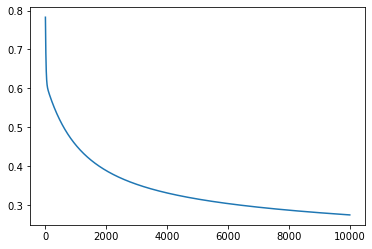

In [7]:
W = eval_model(X_st, y, iterations=10000, eta=1e-1)

### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [8]:
def calc_pred_proba(W, X):
    z = np.dot(W, X.T)
    y_pred_proba = sigmoid(z)
    return y_pred_proba

In [9]:
y_pred_proba = calc_pred_proba(W , X_st)
y_pred_proba

array([0.33338316, 0.21066949, 0.97799037, 0.00748057, 0.65155054,
       0.33970183, 0.99159526, 0.16101487, 0.36913486, 0.95298153])

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [10]:
def calc_pred(W, X, split_level=0.5):
    z = np.dot(W, X.T)
    y_pred = sigmoid(z)    
    y_pred[y_pred >= split_level] = 1
    y_pred[y_pred < split_level] = 0
    return y_pred

In [11]:
y_pred = calc_pred(W, X_st, 0.5)

array([0., 0., 1., 0., 1., 0., 1., 0., 0., 1.])

### 5. * Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [27]:
def metrics(y, y_pred):    
    accuracy = ((y-y_pred)==0).sum() / len(y)

    TP = y[(y - y_pred) == 0].sum().astype(int)
    FP = ((y - y_pred) == -1).sum().astype(int)
    TN = (y[(y - y_pred) == 0]==0).sum().astype(int)
    FN = ((y - y_pred) == 1).sum().astype(int)

    print(f'\nМатрица ошибок\n\n1:\t{int(TP)}\t{FP}\n0:\t{FN}\t{TN}\n')

    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    F1_score = 2 * precision * recall / (precision + recall)

    print(f'accuracy = {accuracy}')
    print(f'precision = {round(precision, 2)}')
    print(f'recall = {recall}')
    print(f'F1_score = {round(F1_score, 2)}')

In [28]:
metrics(y, y_pred)


Матрица ошибок

1:	4	0
0:	1	5

accuracy = 0.9
precision = 1.0
recall = 0.8
F1_score = 0.89


### 6. Могла ли модель переобучиться? Почему?


Может потому что данных слишком мало , модель подстроится под тренировочные данные а на тесте будет показывать себя плохо